In [15]:
using Revise

In [16]:
using
    QuantumStates,
    OpticalBlochEquations,
    DifferentialEquations,
    UnitsToValue,
    LinearAlgebra,
    Plots
;

In [17]:
const λ = 1
const Γ = 2π * 6
const m = 1
const k = 2π / λ
;

KeyError: KeyError: key "debug_request" not found

KeyError: KeyError: key "debug_request" not found

In [4]:
H_operator = :(
    B * Rotation +
    T * excited +
    B_z * (Zeeman_L0_N1 + Zeeman_L2) +
    S * identity1
)
parameters = @params begin
    B = 13.
    T = 1e6
    B_z = 1e-6
    S = 50
end

# Create basis states
QN_bounds = (L = 0, N = 1)
ground_states1 = enumerate_states(AngularMomentumState_Labelled, QN_bounds)

QN_bounds = (L = 2, N = 1)
ground_states2 = enumerate_states(AngularMomentumState_Labelled, QN_bounds)

QN_bounds = (L = 1, N = 1)
excited_states = enumerate_states(AngularMomentumState_Labelled, QN_bounds)

# Create Hamiltonian
ground_states = [ground_states1; ground_states2]
basis = [ground_states; excited_states]
H = Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)

evaluate!(H)
QuantumStates.solve!(H)

update_basis_tdms!(H)
update_tdms!(H)
d = H.tdms

# d[9:end, 1:8, :] ./= sqrt(sum(d[9:end, 1:8, :].^2))
# d[1:8, 9:end, :] ./= sqrt(sum(d[1:8, 9:end, :].^2))
# d[1:8,1:8,:] .= 0.0
# d[9:end,9:end,:] .= 0.0
;

In [5]:
energy.(H.states)

9-element Vector{Float64}:
 25.999999
 26.0
 26.000001
 75.999999
 76.0
 76.000001
  1.000026e6
  1.000026e6
  1.000026e6

In [6]:
ϕ = π/8

lin_xy = cart2sph * [1,0,0]
linϕ_xy = cart2sph * [cos(ϕ), sin(ϕ), 0]

lin_yz = cart2sph * [0,1,0]
linϕ_yz = cart2sph * [0, cos(ϕ), sin(ϕ)]

lin_zx = cart2sph * [0,0,1]
linϕ_zx = cart2sph * [sin(ϕ), 0, cos(ϕ)]
;

In [7]:
# Laser parameters
Δ1 = +1Γ
Δ2 = +1Γ - 0.4Γ
Δ3 = +1Γ #- 0.1Γ
s = 10.0

# Frequency of the lasers (in angular frequency units)
ω1 = 2π * (energy(H.states[end]) - energy(H.states[2])) + Δ1
ω2 = 2π * (energy(H.states[end]) - energy(H.states[6])) + Δ2
ω3 = 2π * (energy(H.states[end]) - energy(H.states[6])) + Δ3

ϵ_(ϵ1) = t -> ϵ1
s_func(s) = (r,t) -> s

k̂ = +x̂; ϵ1 = ϵ_(rotate_pol(σ⁺, k̂)); laser1 = Field(k̂, ϵ1, ω1, s_func(s))
k̂ = -x̂; ϵ2 = ϵ_(rotate_pol(σ⁺, k̂)); laser2 = Field(k̂, ϵ2, ω1, s_func(s))
k̂ = +ŷ; ϵ3 = ϵ_(rotate_pol(σ⁺, k̂)); laser3 = Field(k̂, ϵ3, ω1, s_func(s))
k̂ = -ŷ; ϵ4 = ϵ_(rotate_pol(σ⁺, k̂)); laser4 = Field(k̂, ϵ4, ω1, s_func(s))
k̂ = +ẑ; ϵ5 = ϵ_(rotate_pol(σ⁻, k̂)); laser5 = Field(k̂, ϵ5, ω1, s_func(s))
k̂ = -ẑ; ϵ6 = ϵ_(rotate_pol(σ⁻, k̂)); laser6 = Field(k̂, ϵ6, ω1, s_func(s))

# lasers_1 = [laser1, laser2, laser3, laser4, laser5, laser6]
lasers_1 = [laser5, laser6]

k̂ = +x̂; ϵ7 = ϵ_(rotate_pol(σ⁺, k̂)); laser7 = Field(k̂, ϵ7, ω2, s_func(2s))
k̂ = -x̂; ϵ8 = ϵ_(rotate_pol(σ⁺, k̂)); laser8 = Field(k̂, ϵ8, ω2, s_func(2s))
k̂ = +ŷ; ϵ9 = ϵ_(rotate_pol(σ⁺, k̂)); laser9 = Field(k̂, ϵ9, ω2, s_func(2s))
k̂ = -ŷ; ϵ10 = ϵ_(rotate_pol(σ⁺, k̂)); laser10 = Field(k̂, ϵ10, ω2, s_func(2s))
# k̂ = +ẑ; ϵ11 = ϵ_(rotate_pol(σ⁻, k̂)); laser11 = Field(k̂, ϵ11, ω2, s_func(2s))
# k̂ = -ẑ; ϵ12 = ϵ_(rotate_pol(σ⁻, k̂)); laser12 = Field(k̂, ϵ12, ω2, s_func(2s))

k̂ = +ẑ; ϵ11 = ϵ_(rotate_pol(lin_xy, k̂)); laser11 = Field(k̂, ϵ11, ω2, s_func(2s))
k̂ = -ẑ; ϵ12 = ϵ_(rotate_pol(lin_xy, k̂)); laser12 = Field(k̂, ϵ12, ω2, s_func(2s))

# k̂ = +x̂; ϵ7 = ϵ_(rotate_pol(σ⁻, k̂)); laser7 = Field(k̂, ϵ7, ω2, s_func(2s))
# k̂ = -x̂; ϵ8 = ϵ_(rotate_pol(σ⁻, k̂)); laser8 = Field(k̂, ϵ8, ω2, s_func(2s))
# k̂ = +ŷ; ϵ9 = ϵ_(rotate_pol(σ⁻, k̂)); laser9 = Field(k̂, ϵ9, ω2, s_func(2s))
# k̂ = -ŷ; ϵ10 = ϵ_(rotate_pol(σ⁻, k̂)); laser10 = Field(k̂, ϵ10, ω2, s_func(2s))
# k̂ = +ẑ; ϵ11 = ϵ_(rotate_pol(σ⁺, k̂)); laser11 = Field(k̂, ϵ11, ω2, s_func(2s))
# k̂ = -ẑ; ϵ12 = ϵ_(rotate_pol(σ⁺, k̂)); laser12 = Field(k̂, ϵ12, ω2, s_func(2s))

# lasers_2 = [laser7, laser8, laser9, laser10, laser11, laser12]
lasers_2 = [laser11, laser12]

k̂ = +x̂; ϵ13 = ϵ_(rotate_pol(σ⁺, k̂)); laser13 = Field(k̂, ϵ13, ω3, s_func(s))
k̂ = -x̂; ϵ14 = ϵ_(rotate_pol(σ⁺, k̂)); laser14 = Field(k̂, ϵ14, ω3, s_func(s))
k̂ = +ŷ; ϵ15 = ϵ_(rotate_pol(σ⁺, k̂)); laser15 = Field(k̂, ϵ15, ω3, s_func(s))
k̂ = -ŷ; ϵ16 = ϵ_(rotate_pol(σ⁺, k̂)); laser16 = Field(k̂, ϵ16, ω3, s_func(s))
k̂ = +ẑ; ϵ17 = ϵ_(rotate_pol(σ⁻, k̂)); laser17 = Field(k̂, ϵ17, ω3, s_func(s))
k̂ = -ẑ; ϵ18 = ϵ_(rotate_pol(σ⁻, k̂)); laser18 = Field(k̂, ϵ18, ω3, s_func(s))

lasers_3 = [laser13, laser14, laser15, laser16, laser17, laser18]

# k̂ = +x̂; ϵ1 = ϵ_(lin_yz); laser1 = Field(k̂, ϵ1, ω1, s_func(s))
# k̂ = -x̂; ϵ2 = ϵ_(linϕ_yz); laser2 = Field(k̂, ϵ2, ω1, s_func(s))
# k̂ = +ŷ; ϵ3 = ϵ_(lin_zx); laser3 = Field(k̂, ϵ3, ω1, s_func(s))
# k̂ = -ŷ; ϵ4 = ϵ_(linϕ_zx); laser4 = Field(k̂, ϵ4, ω1, s_func(s))
# k̂ = +ẑ; ϵ5 = ϵ_(lin_xy); laser5 = Field(k̂, ϵ5, ω1, s_func(s))
# k̂ = -ẑ; ϵ6 = ϵ_(linϕ_xy); laser6 = Field(k̂, ϵ6, ω1, s_func(s))

lasers = [lasers_1; lasers_2]
# lasers = [lasers_1; lasers_2; lasers_3]
;

In [8]:
# `Particle` type defines the starting position `r0` and velocity `v` used for the simulation
particle = Particle()

# Define the density matrix `ρ0` at t = 0
ρ0 = zeros(ComplexF64, length(H.states), length(H.states))
ρ0[4,4] = 1.0

# `freq_res` designates the resolution used for the frequencies and velocity used in the simulation
freq_res = 1e-2

p = obe(ρ0, particle, H.states, lasers, d, nothing, true, true, λ, Γ, freq_res, nothing)

# Define the end time `t_end` of the simulation
t_end = 10p.period
tspan = (0., t_end)

prob = ODEProblem(ρ!, p.ρ0_vec, tspan, p)
;

In [9]:
callback = PeriodicCallback(reset_force!, prob.p.period)

prob.p.r0 = (0., 0., 0.) ./ (1/k)
prob.p.v = (0., 0., 0.0)
@time sol = DifferentialEquations.solve(prob, alg=DP5(), reltol=1e-4, callback=callback)
prob.p.force_last_period .* 1e3

  8.975461 seconds (10.12 M allocations: 773.975 MiB, 4.68% gc time, 97.19% compilation time)


3-element StaticArraysCore.SVector{3, Float64} with indices SOneTo(3):
  0.0
  0.0
 -0.0015794122020972344

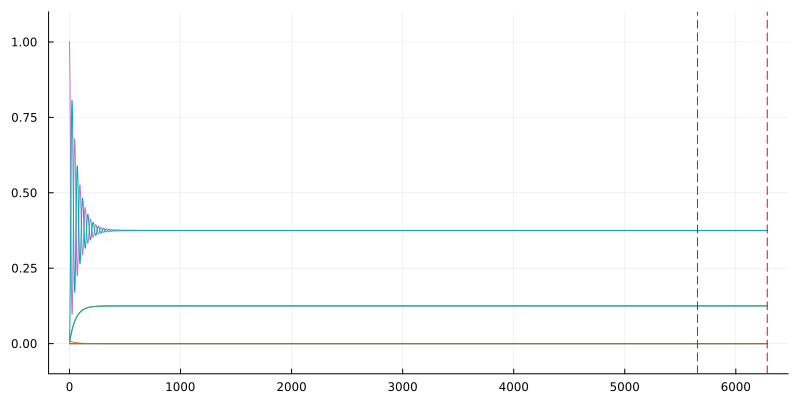

In [10]:
using Plots
plot_us = sol.u[1:10:end]
plot_ts = sol.t[1:10:end]

n_states = size(p.ρ_soa, 1)
plot(size=(800, 400), ylim=(-0.1, 1.1), legend=nothing)
for i in 1:n_states
    state_idx = n_states*(i-1) + i
    plot!(plot_ts, [real(u[state_idx]) for u in plot_us])
end
plot!()
offset = 0
vline!([sol.t[end] - prob.p.period - offset, sol.t[end] - offset], color="red", linestyle=:dash)

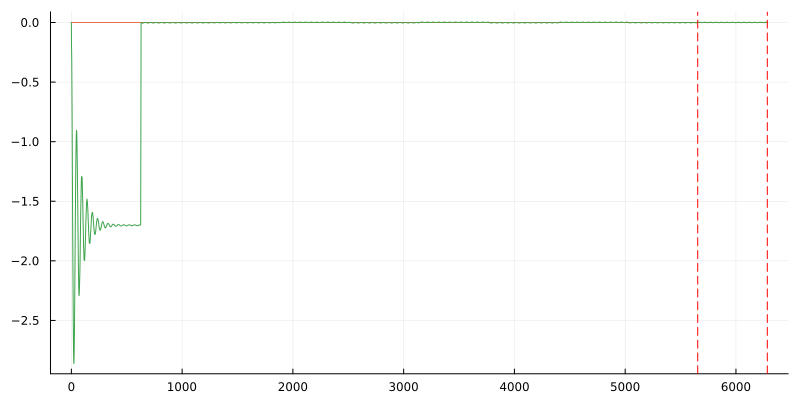

In [11]:
plot(size=(800, 400), legend=nothing)
plot!(plot_ts, 1e3 .* [real(u[end-2]) for u in plot_us] ./ prob.p.period)
plot!(plot_ts, 1e3 .* [real(u[end-1]) for u in plot_us] ./ prob.p.period)
plot!(plot_ts, 1e3 .* [real(u[end]) for u in plot_us] ./ prob.p.period)
plot!()
offset = 0
vline!([sol.t[end] - prob.p.period - offset, sol.t[end] - offset], color="red", linestyle=:dash)

In [245]:
using Distributions
uniform_dist = Uniform(0, 2π)
function sample_direction(r=1.0)
    θ = 2π * rand()
    z = rand() * 2 - 1
    return (r * sqrt(1 - z^2) * cos(θ), r * sqrt(1 - z^2) * sin(θ), r * z)
end
;

## Laser cooling force versus magnetic field

In [246]:
function prob_func!(prob, scan_params, i)
    p = prob.p
    
    # Update velocity and position
    p.particle.v .= scan_params[i].v
    p.particle.r0 .= scan_params[i].r
    
    # Update magnetic field
    H = p.extra_p.H
    H.parameters.B_z = scan_params[i].B
    evaluate!(H)
    QuantumStates.solve!(H)
    
    # Update transition dipole moments
    update_basis_tdms!(H)
    update_tdms!(H)
    new_d = H.tdms
    
    new_d[1:6,7:9, :] ./= sqrt(sum(new_d[1:6, 7:9, :].^2))
    new_d[1:6,1:6,:] .= 0.0
    new_d[7:9,7:9,:] .= 0.0
    
    new_p = obe(p.ρ0, p.particle, H.states, p.extra_p.lasers, new_d, nothing, true, true, p.λ, p.Γ, p.freq_res, p.extra_p)
    
    return remake(prob, p=new_p)
end
function output_func(p, sol)
    f = p.force_last_period
    return f
end
;

In [247]:
using RectiGrids

freq_res = 1e-2
extra_p = (H=H, lasers=lasers)
p = obe(ρ0, particle, H.states, lasers, d, nothing, true, nothing, λ, Γ, freq_res, extra_p)

t_end = 10p.period+1; tspan = (0., t_end)
prob = ODEProblem(ρ!, p.ρ0_vec, tspan, p, reltol=1e-3, save_on=false)

Bs = (-5.0:1.0:5.0)
di = 7
rs = vcat([(n1*λ/(di+1), n2*λ/(di+1), n3*λ/(di+1)) .* 2π for n1 ∈ 0:di, n2 ∈ 0:di, n3 ∈ 0:di]...)
vs = [sample_direction(0.0) for _ in 1:1]

scan_values = (B = Bs, r = rs, v = vs)
scan_values_grid = RectiGrids.grid(scan_values)
;

In [248]:
@time forces, populations = force_scan_v2(prob, scan_values_grid, prob_func!, output_func);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


 87.613145 seconds (5.12 M allocations: 687.005 MiB, 63.85% compilation time)


In [249]:
averaged_forces = []
@time for (i,B) ∈ enumerate(Bs)
    idxs = [j for (j,x) ∈ enumerate(scan_values_grid) if x.B == B]
    push!(averaged_forces, mean([f[3] for f in forces[idxs]]))
end

  0.123951 seconds (77.41 k allocations: 5.320 MiB, 98.43% compilation time)


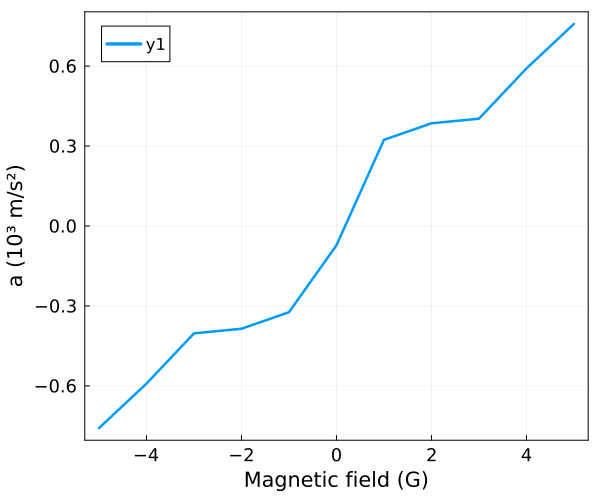

In [239]:
plot(Bs, 1e3 .* averaged_forces,
    xlabel="Magnetic field (G)",
    ylabel="a (10³ m/s²)",
    framestyle=:box,
    linewidth=2.5,
    labelfontsize=14, 
    tickfont=12,
    legendfont=11,
    # ylim=(-3,23),
    size=(600,500)
    )

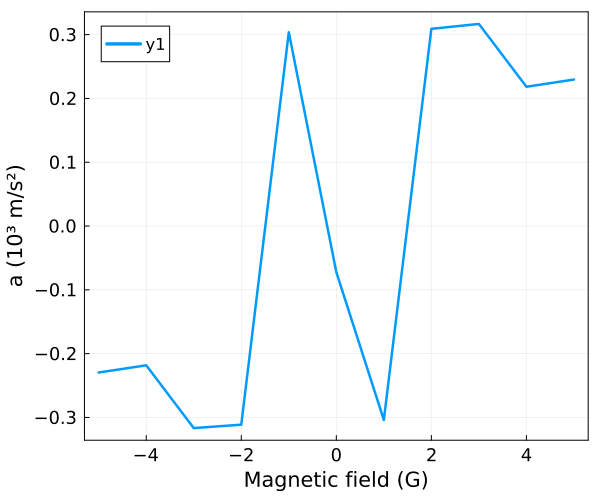

In [250]:
plot(Bs, 1e3 .* averaged_forces,
    xlabel="Magnetic field (G)",
    ylabel="a (10³ m/s²)",
    framestyle=:box,
    linewidth=2.5,
    labelfontsize=14,
    tickfont=12,
    legendfont=11,
    # ylim=(-3,23),
    size=(600,500)
    )

In [198]:
averaged_populations = []
@time for (i,B) ∈ enumerate(Bs)
    idxs = [j for (j,x) ∈ enumerate(scan_values_grid) if x.B == B]
    push!(averaged_populations, mean([p for p in populations[idxs,:]], dims=1))
end

  0.101904 seconds (52.44 k allocations: 4.248 MiB, 98.69% compilation time)


In [199]:
averaged_populations[end]'

9×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.12722993313665215
 0.29382455732645407
 0.10047783597030142
 0.09668301253620704
 0.23395996705643674
 0.06736960659733499
 0.04051964995337813
 0.02056126433837879
 0.01937417308485706

In [200]:
6.4e6 * Γ * sum(averaged_populations[end][9:end])

4.674490355156278e6

## Laser cooling force versus velocity

In [20]:
function prob_func!(prob, scan_params, i)
    p = prob.p
    # Update velocity and position
    p.v .= (scan_params[i].v, 0.0, 0.1)
    p.v .= round_vel(p.v, p.freq_res)
    p.r0 .= scan_params[i].r
    return prob
end
function output_func(p, sol)
    f = p.force_last_period
    return (f[1], 0, 0)
end
;

In [21]:
using RectiGrids
di = 7
rs = vcat([(n1*λ/(di+1), n2*λ/(di+1), n3*λ/(di+1)) .* 2π for n1 ∈ 0:di, n2 ∈ 0:di, n3 ∈ 0:di]...)
vs = 0:0.1:7.0

scan_values = (r = rs, v = vs)
scan_values_grid = RectiGrids.grid(scan_values)
;

In [22]:
freq_res = 1e-1
p = obe(ρ0, particle, H.states, lasers, d, d, true, true, λ, Γ, freq_res)

t_end = 5p.period+1; tspan = (0., t_end)
prob = ODEProblem(ρ!, p.ρ0_vec, tspan, p, reltol=1e-5, save_on=false)
;

In [23]:
@time forces, populations = force_scan_v2(prob, scan_values_grid, prob_func!, output_func);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:51m


 51.214365 seconds (8.85 M allocations: 1.605 GiB, 0.65% gc time, 59.94% compilation time)


In [24]:
averaged_forces = []
@time for (i,v) ∈ enumerate(vs)
    idxs = [j for (j,x) ∈ enumerate(scan_values_grid) if x.v == v]
    push!(averaged_forces, mean([f[1] for f in forces[idxs]]))
end

  0.178900 seconds (183.59 k allocations: 13.820 MiB, 92.20% compilation time)


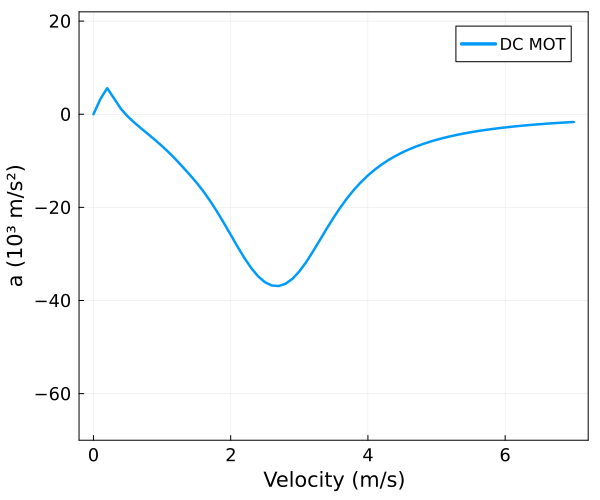

In [25]:
plot(vs, 1e3 .* averaged_forces,
    xlabel="Velocity (m/s)",
    ylabel="a (10³ m/s²)",
    framestyle=:box,
    linewidth=2.5,
    labelfontsize=14,
    tickfont=12,
    legendfont=11,
    ylim=(-70,22),
    label="DC MOT",
    size=(600,500)
    )

In [26]:
function prob_func!(prob, scan_params, i)
    p = prob.p
    # Update velocity and position
    p.v .= sample_direction(scan_params.v[i])
    p.v .= round_vel(p.v, p.freq_res)
    p.r0 .= rand(uniform_dist, 3)
    prob
end
function param_func(prob, scan_params, i)
    return scan_params.v[i]
end
function output_func(p, sol)
    f = p.force_last_period
    return (f ⋅ p.v / norm(p.v), 0, 0)
end
;

In [27]:
freq_res = 1e-2
p = obe(ρ0, particle, H.states, lasers, d, d, true, true, λ, Γ, freq_res)

t_end = 10p.period+1; tspan = (0., t_end)
prob = ODEProblem(ρ!, p.ρ0_vec, tspan, p, reltol=1e-4, save_on=false)

n_samples = 100
vs = repeat(collect(0:0.01:1.0), n_samples)

using RectiGrids
scan_values = (v = vs,)
scan_values_grid = RectiGrids.grid(scan_values)
;

In [28]:
@time forces, populations = force_scan_v2(prob, scan_values_grid, prob_func!, output_func);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:34


 34.660219 seconds (1.62 M allocations: 398.761 MiB, 0.20% gc time, 5.88% compilation time)


In [29]:
averaged_forces = []
@time for (i,v) ∈ enumerate(vs)
    idxs = [j for (j,x) ∈ enumerate(scan_values_grid) if x.v == v]
    push!(averaged_forces, mean([f[1] for f in forces[idxs]]))
end

  0.283338 seconds (368.51 k allocations: 66.190 MiB, 11.70% gc time, 41.73% compilation time)


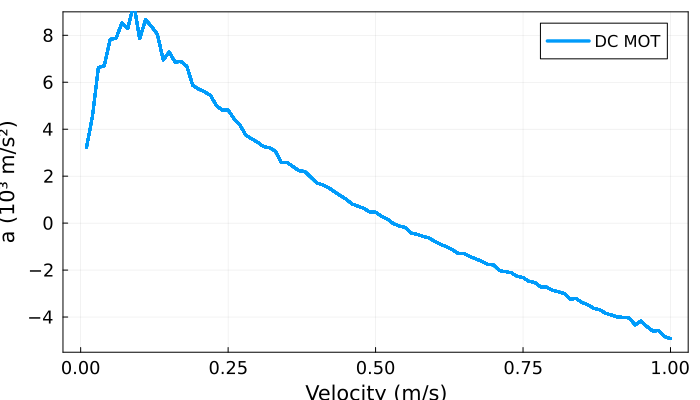

In [30]:
plot(vs, 1e3 .* averaged_forces,
    xlabel="Velocity (m/s)",
    ylabel="a (10³ m/s²)",
    framestyle=:box,
    linewidth=2.5,
    labelfontsize=14,
    tickfont=12,
    legendfont=11,
    label="DC MOT",
    ylim=(-5.5,9),
    size=(700,400)
    )